In [2]:
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 

**Load Model**

In [3]:
model = tf.keras.models.load_model('trained_model.keras')

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 80)                  │         120,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,717,414 (90.47 MB)

 Trainable params: 7,905,804 (30.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,811,610 (60.32 MB)

**Visualizing single image of test set**

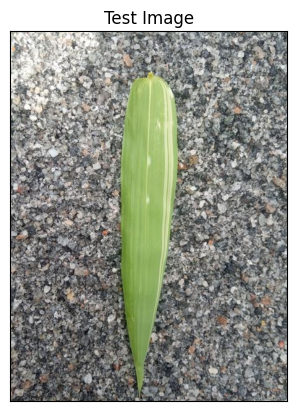

In [72]:
import cv2
import numpy as np
from PIL import Image
# Load the image
img = Image.open("test/1556.jpg")
# Convert the image data to a numpy array
img_array = np.array(img)
# Convert the image data to float
img_float = img_array.astype(float)

image_path = "test/1556.jpg"
#reading image
img = cv2.imread(image_path)
#to get actual image color [Convert bgr to rgb] 
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#displaying image 
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

**Testing Model**

In [73]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #convert single image to batch 
print(input_arr.shape)

(1, 128, 128, 3)


In [74]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


(array([[1.10691860e-06, 4.69102424e-10, 4.64596805e-10, 8.68993191e-14,
         4.60560756e-12, 1.93480774e-14, 1.90168736e-12, 9.99994040e-01,
         1.64997095e-06, 3.07991098e-11, 1.26087485e-07, 1.27929141e-07,
         3.08594133e-13, 1.88620142e-08, 9.07468816e-13, 6.51747604e-14,
         1.04333087e-09, 1.80213754e-12, 1.73802128e-08, 3.67092627e-14,
         1.06455379e-10, 1.88801266e-07, 4.26982716e-09, 8.84262227e-13,
         1.04301602e-10, 1.00037235e-10, 7.94581041e-08, 2.66970977e-11,
         1.56018698e-10, 5.86716162e-11, 2.01138748e-13, 1.83757909e-09,
         7.23321333e-11, 4.75158801e-12, 1.67004674e-11, 5.37363600e-12,
         6.68840400e-11, 2.04521431e-13, 4.46057358e-11, 6.36901476e-10,
         5.91192650e-11, 8.73820634e-12, 1.11816622e-12, 1.56189124e-12,
         3.28343568e-11, 9.06382039e-14, 6.75906622e-11, 1.06061141e-11,
         2.63069799e-14, 1.98786343e-09, 5.25303143e-08, 2.47582807e-06,
         1.62271902e-13, 1.40254947e-10, 1.29304434

In [75]:
result_index = np.argmax(prediction)
result_index

7

In [76]:
class_name = ['Aloevera',
 'Amla',
 'Amruthaballi',
 'Arali',
 'Astma_weed',
 'Badipala',
 'Balloon_Vine',
 'Bamboo',
 'Beans',
 'Betel',
 'Bhrami',
 'Bringaraja',
 'Caricature',
 'Castor',
 'Catharanthus',
 'Chakte',
 'Chilly',
 'Citron lime (herelikai)',
 'Coffee',
 'Common rue(naagdalli)',
 'Coriender',
 'Curry',
 'Doddpathre',
 'Drumstick',
 'Ekka',
 'Eucalyptus',
 'Ganigale',
 'Ganike',
 'Gasagase',
 'Ginger',
 'Globe Amarnath',
 'Guava',
 'Henna',
 'Hibiscus',
 'Honge',
 'Insulin',
 'Jackfruit',
 'Jasmine',
 'Kambajala',
 'Kasambruga',
 'Kohlrabi',
 'Lantana',
 'Lemon',
 'Lemongrass',
 'Malabar_Nut',
 'Malabar_Spinach',
 'Mango',
 'Marigold',
 'Mint',
 'Neem',
 'Nelavembu',
 'Nerale',
 'Nooni',
 'Onion',
 'Padri',
 'Palak(Spinach)',
 'Papaya',
 'Parijatha',
 'Pea',
 'Pepper',
 'Pomoegranate',
 'Pumpkin',
 'Raddish',
 'Rose',
 'Sampige',
 'Sapota',
 'Seethaashoka',
 'Seethapala',
 'Spinach1',
 'Tamarind',
 'Taro',
 'Tecoma',
 'Thumbe',
 'Tomato',
 'Tulsi',
 'Turmeric',
 'ashoka',
 'camphor',
 'kamakasturi',
 'kepala']

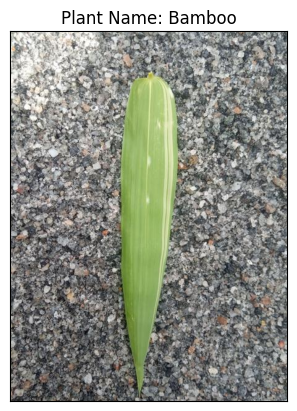

In [77]:
#displaying result of plant prediction 
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Plant Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [78]:
model_prediction

'Bamboo'